In [1]:
## import packages
# import requisite packages
import pandas as pd
import FlowCytometryTools as fct
import os
from pylab import *
from plotnine import *
from plotnine.data import *
from itertools import combinations

C:\Users\nickh\Anaconda3\lib\site-packages\FlowCytometryTools\core\docstring.py:56: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  doc = dedent(doc)
C:\Users\nickh\Anaconda3\lib\site-packages\FlowCytometryTools\core\docstring.py:56: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  doc = dedent(doc)


In [2]:
### FUNCTIONS ###
# define function that takes log transform of fluorecent channels
def log_transform(original_sample, other_channels = []):
    """ This function implements a log transformation on the data. """
    # Copy the original sample
    new_sample = original_sample.copy()
    new_data = new_sample.data

    # Our transformation goes here
    new_data['FITC-A_log'] = np.log10(new_data['FITC-A'])
    new_data['PE-A_log'] = np.log10(new_data['PE-A'])
    
    # parse through other fluorescent channels, if added
    if len(other_channels) > 1:
        for channel in other_channels:
            new_data[channel] = log(new_data[channel])
    
    new_data = new_data.dropna()  # Removes all NaN entries
    new_sample.data = new_data
    return new_sample

In [3]:
### LOAD AND SET GATES WITH CONTROL DATA ###
# load control data
datadir = "../data/"
datafile = "../data/U2OS C11 11-07-17_A01_001.fcs"
control = fct.FCMeasurement(ID = 'control', datafile = datafile)

# transform values of FITC, PE-YG into log values
control = control.apply(log_transform)

control.channels

C:\Users\nickh\AppData\Roaming\Python\Python37\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\nickh\AppData\Roaming\Python\Python37\site-packages\pandas\core\series.py:853: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,$PnN,$PnR,$PnB,$PnE,$PnV,$PnG
Channel Number,,,,,,
1,FSC-A,262144,32,"[0, 0]",180,1.0
2,FSC-W,262144,32,"[0, 0]",180,1.0
3,SSC-A,262144,32,"[0, 0]",220,1.0
4,Alexa Fluor 700-A,262144,32,"[0, 0]",430,1.0
5,Alexa Fluor 700-W,262144,32,"[0, 0]",430,1.0
6,PE-A,262144,32,"[0, 0]",320,1.0
7,FITC-A,262144,32,"[0, 0]",230,1.0
8,Time,262144,32,"[0, 0]",None,0.01


(array([[ 4.,  2.,  1., ..., nan, nan, nan],
        [ 3.,  3.,  2., ..., nan, nan, nan],
        [ 4.,  2.,  4., ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 array([  4960.90966797,   6246.82011963,   7532.73057129,   8818.64102295,
         10104.55147461,  11390.46192627,  12676.37237793,  13962.28282959,
         15248.19328125,  16534.10373291,  17820.01418457,  19105.92463623,
         20391.83508789,  21677.74553955,  22963.65599121,  24249.56644287,
         25535.47689453,  26821.38734619,  28107.29779785,  29393.20824951,
         30679.11870117,  31965.02915283,  33250.93960449,  34536.85005615,
         35822.76050781,  37108.67095947,  38394.58141113,  39680.49186279,
         40966.40231445,  42252.31276611,  43538.22321777,  44824.13366943,
         46110.04412109,  47395.95457275,  48681.86502441,  49967.77547607,
         51253.68592773,  52539

C:\Users\nickh\Anaconda3\lib\site-packages\matplotlib\colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


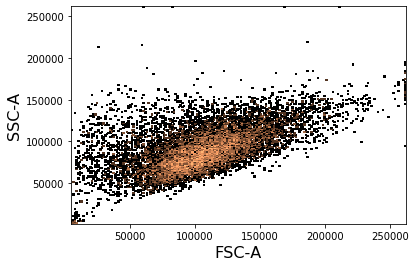

In [4]:
# plot FSC by SSC
figure()

control.plot(['FSC-A', 'SSC-A'])

In [5]:
# use GUIt o set gates
#control.view_interactively(backend='wx')

(array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 array([ 35352.1875 ,  36197.85375,  37043.52   ,  37889.18625,
         38734.8525 ,  39580.51875,  40426.185  ,  41271.85125,
         42117.5175 ,  42963.18375,  43808.85   ,  44654.51625,
         45500.1825 ,  46345.84875,  47191.515  ,  48037.18125,
         48882.8475 ,  49728.51375,  50574.18   ,  51419.84625,
         52265.5125 ,  53111.17875,  53956.845  ,  54802.51125,
         55648.1775 ,  56493.84375,  57339.51   ,  58185.17625,
         59030.8425 ,  59876.50875,  60722.175  ,  61567.84125,
         62413.5075 ,  63259.17375,  64104.84   ,  64950.50625,
         65796.1725 ,  66641.83875,  67487.505  ,  68333.17125,
         69178.8375 ,  70024.50375,  70870.17   ,  71715.83625,
         72

C:\Users\nickh\Anaconda3\lib\site-packages\matplotlib\colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


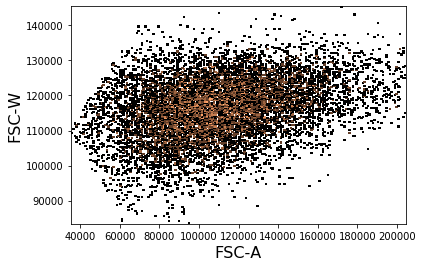

In [6]:
gate1 = fct.PolyGate([(5.829e+04, 8.793e+04), (3.434e+04, 1.101e+05), (6.951e+04, 1.407e+05), (1.669e+05, 1.492e+05), (2.036e+05, 1.384e+05), (2.061e+05, 1.117e+05), (1.337e+05, 8.410e+04), (6.135e+04, 8.257e+04)], ('FSC-A', 'FSC-W'), region='in', name='gate1')

# apply live gate
live = control.gate(gate1)

# plot singlets on FSC-W by FSC-A
figure()

live.plot(['FSC-A', 'FSC-W'])

In [7]:
# use GUIt o set gates
#live.view_interactively(backend='wx')

C:\Users\nickh\AppData\Roaming\Python\Python37\site-packages\plotnine\stats\stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 84'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']), PlotnineWarning)


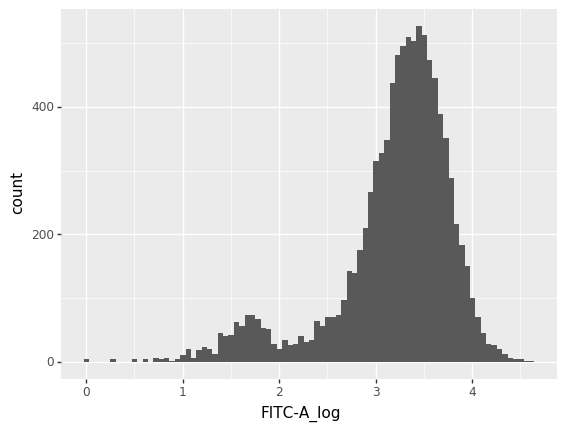

<ggplot: (139486192104)>

In [8]:
# generate singlets gate (see singletgate.png for details)
gate2 = fct.PolyGate([(8.886e+04, 9.994e+04), (6.070e+04, 1.056e+05), (5.802e+04, 1.213e+05), (1.026e+05, 1.350e+05), (1.640e+05, 1.379e+05), (1.794e+05, 1.296e+05), (1.777e+05, 1.119e+05), (1.221e+05, 9.994e+04), (1.221e+05, 9.994e+04)], ('FSC-A', 'FSC-W'), region='in', name='gate2')
# gate out doublets
singlets = live.gate(gate2)

singlets.data = singlets.data.replace([-np.Inf, np.Inf], NaN).dropna()

# remove inf values
ggplot(aes(x='FITC-A_log'), data = singlets.data) + geom_histogram()

(array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 array([2.50125098, 2.51186431, 2.52247763, 2.53309095, 2.54370428,
        2.5543176 , 2.56493092, 2.57554425, 2.58615757, 2.59677089,
        2.60738422, 2.61799754, 2.62861086, 2.63922419, 2.64983751,
        2.66045083, 2.67106416, 2.68167748, 2.6922908 , 2.70290413,
        2.71351745, 2.72413077, 2.7347441 , 2.74535742, 2.75597075,
        2.76658407, 2.77719739, 2.78781072, 2.79842404, 2.80903736,
        2.81965069, 2.83026401, 2.84087733, 2.85149066, 2.86210398,
        2.8727173 , 2.88333063, 2.89394395, 2.90455727, 2.9151706 ,
        2.92578392, 2.93639724, 2.94701057, 2.95762389, 2.96823721,
        2.97885054, 2.98946386, 3.00007718, 3.01069051, 3.02130383,
        3.03191715, 3.04253048, 3.0

C:\Users\nickh\Anaconda3\lib\site-packages\matplotlib\colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


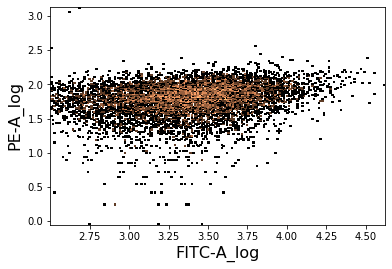

In [9]:
# generate FITC gate (see livegate.png for details)
gate3 = fct.ThresholdGate(threshold = 2.5, channel = 'FITC-A_log', region='above', name='gate3')
# apply live gate
dendra2pos = singlets.gate(gate3)

# clean up dataframe
dendra2pos.data = dendra2pos.data.replace([np.inf, -np.inf], np.nan).dropna()

# plot singlets on FSC-W by FSC-A
figure()

dendra2pos.plot(['FITC-A_log', 'PE-A_log'])

In [10]:
## use all gates on the whole dataset
# define the parser to get well names (reqd by FlowCytometryTools to import mulitple datsets as plate)
    
# define the parser for flowcytometrytools
def parser(filename):
    return(filename.split('_')[-2])

def position_mapper(key):
    row = {'A':0, 'B':1}
    return((row(key[0]), ))
        
# import all files from the current diretory
plate = fct.FCPlate.from_dir(ID = 'plate', path = '../data/', parser = parser, position_mapper = 'name')

# remove empty placeholders
plate = plate.dropna()

# apply a log transform to the data, and calculate the ratio
for well in plate.data.keys():
    plate.data[well] = log_transform(plate.data[well])
    plate.data[well].data['ratio'] = pd.to_numeric(plate.data[well].data.loc[:,'PE-A']).div(pd.to_numeric(plate.data[well].data.loc[:,'FITC-A']), axis = 0)
    plate.data[well].data['ratio_log'] = np.log10(plate.data[well].data['ratio'])

# gate plate on all gates
plate = plate.gate(gate1).gate(gate2).gate(gate3)

# make a master pandas dataframe of all samples, with the sample ID = one column
def extract_plate_samples(plate):
    
    # function that takes a plate dataframe and key as input and outputs a new dataframe with the key as a column
    def annotate_well(key, plate = plate):
        # store the input dataframe
        data_in = plate.data[key].data
        # create a "well_id" column that contains the well_id (i.e the key)
        well_id = pd.Series(np.repeat(key, len(data_in.index)), index = data_in.index, name = 'well_id')
        # return the contactenation of these two
        return(pd.concat([data_in, well_id], axis = 1))
    
    # apply the annotate_well over the plate 
    master_list = [annotate_well(key, plate) for key in plate.data.keys()]
    
    # take the master_list and turn it into a big dataframe
    return(pd.concat(master_list, axis = 0, ignore_index = True))

# use this function
final_df = extract_plate_samples(plate)

# clean the data
final_df = final_df.replace([-np.Inf, np.Inf], NaN).dropna()
final_df = final_df.merge(pd.read_csv('../data/metadat.csv'), on = 'well_id')

final_df.iloc[:10,:]

C:\Users\nickh\AppData\Roaming\Python\Python37\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\nickh\AppData\Roaming\Python\Python37\site-packages\pandas\core\series.py:853: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,FSC-A,FSC-W,SSC-A,Alexa Fluor 700-A,Alexa Fluor 700-W,PE-A,FITC-A,Time,FITC-A_log,PE-A_log,ratio,ratio_log,well_id,Condition
0,90000.218750,102801.828125,65971.179688,10922.799805,69498.710938,45.389999,2480.560059,52.599998,3.394550,1.656960,0.018298,-1.737590,A01,No activation
1,128972.039062,125215.718750,101688.820312,17827.599609,70633.554688,28.480000,5193.419922,52.799999,3.715453,1.454540,0.005484,-2.260913,A01,No activation
2,80099.976562,108977.210938,63078.539062,14823.899414,67941.742188,47.169998,3277.449951,53.400002,3.515536,1.673666,0.014392,-1.841870,A01,No activation
3,132603.281250,118169.312500,86529.726562,23438.798828,71124.937500,89.000000,10306.040039,53.700001,4.013092,1.949390,0.008636,-2.063702,A01,No activation
4,101962.179688,105418.984375,71549.406250,6800.500000,74180.687500,27.590000,1304.920044,54.099998,3.115584,1.440752,0.021143,-1.674832,A01,No activation
5,80373.875000,106401.015625,66978.148438,15628.899414,73921.445312,83.659996,3167.359863,54.099998,3.500697,1.922518,0.026413,-1.578180,A01,No activation
6,127210.781250,109791.210938,93107.859375,20723.500000,71840.000000,61.410000,2773.459961,54.599998,3.443022,1.788239,0.022142,-1.654783,A01,No activation
7,69338.195312,114186.046875,49358.699219,8303.399414,70080.046875,35.599998,2612.869873,54.700001,3.417118,1.551450,0.013625,-1.865668,A01,No activation
8,102036.046875,113659.359375,81982.710938,9967.299805,68680.156250,44.500000,2084.639893,55.000000,3.319031,1.648360,0.021347,-1.670671,A01,No activation
9,134386.953125,133202.015625,129916.296875,25702.599609,77796.296875,170.880005,1306.939941,55.900002,3.116256,2.232691,0.130748,-0.883564,A01,No activation


In [11]:
# get numbers of cells
final_df.groupby('Condition').apply(shape)

Condition
4-bin activation    (16397, 14)
No activation        (8497, 14)
dtype: object

C:\Users\nickh\AppData\Roaming\Python\Python37\site-packages\plotnine\layer.py:452: PlotnineWarning: geom_histogram : Removed 4 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


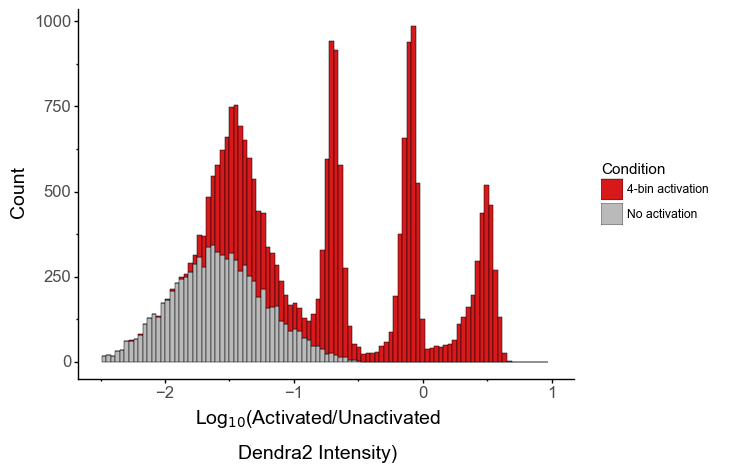

<ggplot: (139489117949)>

In [12]:
## plot the data with histogram
f1d_base = ggplot(aes(x = 'ratio_log', fill = 'Condition'), data = final_df.loc[final_df.ratio_log > -2.5,:])
f1d_hist = geom_histogram(bins = 100, color = 'black', size = 0.2)
f1d_lims = xlim(-2.5, 1)
f1d_xlab = xlab('Log$_{10}$(Activated/Unactivated\n\nDendra2 Intensity)')
f1d_ylab = ylab('Count')
f1d_them = theme_classic() + theme(text=element_text(family="Arial"), axis_text=element_text(size=12), axis_title=element_text(size=14))
f1d_cols = scale_fill_manual(values=['#d7191c', '#bababa'])
f1d_guid = guides(fill=False)

f1d_base + f1d_hist + f1d_lims + f1d_them + f1d_cols + f1d_xlab + f1d_ylab# + f1d_guid

In [13]:
f1d = f1d_base + f1d_hist + f1d_lims + f1d_them + f1d_cols + f1d_xlab + f1d_ylab + f1d_guid

ggsave(f1d, 'F1D.png', dpi = 600, width = 4, height = 3)

C:\Users\nickh\AppData\Roaming\Python\Python37\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 4 x 3 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\nickh\AppData\Roaming\Python\Python37\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: F1D.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
C:\Users\nickh\AppData\Roaming\Python\Python37\site-packages\plotnine\layer.py:452: PlotnineWarning: geom_histogram : Removed 4 rows containing missing values.
  self.data = self.geom.handle_na(self.data)
